In [3]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

from torchvision.transforms import RandomHorizontalFlip
from torch.utils.data import WeightedRandomSampler
from sklearn.metrics import classification_report
from torchvision.transforms import RandomCrop
from torchvision.transforms import Grayscale
from torchvision.transforms import ToTensor
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from main import config as cfg
from main import EarlyStopping
from main import LRScheduler
from torchvision import transforms
from main import EmotionNet
from torchvision import datasets
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
from torch.optim import SGD
import torch.nn as nn
import pandas as pd
import argparse
import torch
import math
from tqdm import tqdm

In [11]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# train_transform = transforms.Compose([
#     Grayscale(num_output_channels=1),
#     RandomHorizontalFlip(),
#     RandomCrop((48, 48)),
#     ToTensor()
# ])
 
# test_transform = transforms.Compose([
#     Grayscale(num_output_channels=1),
#     ToTensor()
# ])
batch_size = 256


trainset = datasets.ImageFolder("dataset/train", transform=transform)
testset = datasets.ImageFolder("dataset/test", transform=transform)

trainloader = DataLoader(trainset, batch_size=batch_size, num_workers = 2)
testloader = DataLoader(testset, batch_size=batch_size, num_workers = 2)

# trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
#                                         download=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
#                                           shuffle=True, num_workers=2)

# testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                        download=True, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
#                                          shuffle=False, num_workers=2)

# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

classes = trainset.classes

num_of_classes = len(classes)
print(f"[INFO] Class labels: {classes}")

[INFO] Class labels: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


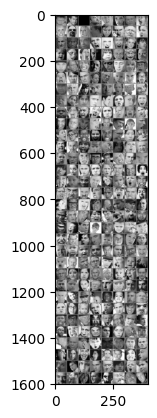

angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angry angr

In [12]:

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [13]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3, 16, 3, 1, padding = 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, padding = 1)
        self.conv3 = nn.Conv2d(32, 64, 3, 1, padding = 1)
        self.fc1 = nn.Linear(4 * 4 * 64, 500)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(500, 10)
        
        

        # self.conv1 = nn.Conv2d(3, 6, 5)
        # self.pool = nn.MaxPool2d(2, 2)
        # self.conv2 = nn.Conv2d(6, 16, 5)
        # self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # self.fc2 = nn.Linear(120, 84)
        # self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*64)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        # x = self.pool(F.relu(self.conv2(x)))
        # x = torch.flatten(x, 1) # flatten all dimensions except batch
        # x = F.relu(self.fc1(x))
        # x = F.relu(self.fc2(x))
        # x = self.fc3(x)
        
        
        # x = self.pool(F.relu(self.conv1(x)))
        # x = self.pool(F.relu(self.conv2(x)))
        # x = torch.flatten(x, 1) # flatten all dimensions except batch
        # x = F.relu(self.fc1(x))
        # x = F.relu(self.fc2(x))
        # x = self.fc3(x)
        return x

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)
net = Net().to(device)

cpu


In [14]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [15]:
from tqdm import tqdm

epochs = 17
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    running_corrects = 0.0
    val_running_loss = 0.0
    val_running_corrects = 0.0
    
    for inputs, labels in tqdm(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        # inputs, labels = data
        # inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)


        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs,1)
  
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)
        
    with torch.no_grad():
        for val_inputs, val_labels in testloader:
            val_inputs = val_inputs.to(device)
            val_labels = val_labels.to(device)
            val_outputs = net(val_inputs)
            val_loss = criterion(val_outputs, val_labels)
            
            
            _, val_preds = torch.max(val_outputs, 1)
            val_running_loss += val_loss.item()
            val_running_corrects += torch.sum(val_preds == val_labels.data)
        epoch_loss = running_loss/(len(trainloader)*batch_size)
        epoch_acc = running_corrects.float()/(len(trainloader)*batch_size)
        running_loss_history.append(epoch_loss)
        running_corrects_history.append(epoch_acc.cpu().numpy())
        
        val_epoch_loss = val_running_loss/(len(testloader)*batch_size)
        val_epoch_acc = val_running_corrects.float()/(len(testloader)*batch_size)
        val_running_loss_history.append(val_epoch_loss)
        val_running_corrects_history.append(val_epoch_acc.cpu().numpy())
        
        
        print("epoch: ", (e+1))
        print("Training Loss: {:.4f}, acc {:.4f} ".format(val_epoch_loss, val_epoch_acc.item()))
        

print('Finished Training')

  0%|                                                                                                                               | 0/113 [00:00<?, ?it/s]


ValueError: Expected input batch_size (576) to match target batch_size (256).